In [151]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
import re
from venn import venn
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# load CCLE data

In [38]:
ccle_sample = pd.read_excel("../data/ccle/Table_S1_Sample_Information.xlsx",
                            sheet_name='Sample_Information')

In [61]:
ccle_protein = pd.read_csv("../data/ccle/protein_quant_current_normalized.csv")
ccle_protein = pd.concat([ccle_protein.iloc[:,4],ccle_protein.iloc[:,48:]],axis=1)
ccle_protein = ccle_protein.set_index("Uniprot").T
ccle_protein.index.name = 'CCLE Code'
ccle_protein = ccle_protein.reset_index()
ccle_protein['CCLE Code'] = ccle_protein['CCLE Code'].map(lambda x:"_".join(x.split('_')[:-1]))

In [63]:
ccle_protein.shape

(378, 12757)

In [62]:
ccle_protein = pd.merge(ccle_protein, ccle_sample[['CCLE Code', 'Cell Line']].drop_duplicates())

In [79]:
ccle_protein.head()

,CCLE Code,S12A2_HUMAN,HXD13_HUMAN,KDM1A_HUMAN,SOX1_HUMAN,SOX2_HUMAN,SOX3_HUMAN,SOX15_HUMAN,PHX2B_HUMAN,ALX4_HUMAN,ALX1_HUMAN,PRRX1_HUMAN,ARX_HUMAN,SHOX2_HUMAN,PRRX2_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA3_HUMAN,SOGA1_HUMAN,NU133_HUMAN,SOGA2_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,FUBP1_HUMAN,FUBP1_HUMAN,MMP24_HUMAN,MMP14_HUMAN,MMP15_HUMAN,SH3R3_HUMAN,SH3R1_HUMAN,SH3R2_HUMAN,MTMRE_HUMAN,SAMD1_HUMAN,S19A2_HUMAN,CLPX_HUMAN,ATX7_HUMAN,CATIN_HUMAN,NUCL_HUMAN,H7BY16_HUMAN,U119B_HUMAN,U119A_HUMAN,RBM42_HUMAN,RCC2_HUMAN,CHPF2_HUMAN,TAL1_HUMAN,LYL1_HUMAN,RNBP6_HUMAN,IPO5_HUMAN,...,SCNNG_HUMAN,MOT5_HUMAN,F168A_HUMAN,TMPS2_HUMAN,H0Y572_HUMAN,ECP_HUMAN,CCD37_HUMAN,TM2D1_HUMAN,RM42_HUMAN,CNIH1_HUMAN,PEMT_HUMAN,VCC1_HUMAN,SLX1_HUMAN,TM127_HUMAN,CATE_HUMAN,KISS1_HUMAN,COX14_HUMAN,GNT2A_HUMAN,LUR1L_HUMAN,ELOV4_HUMAN,EPT1_HUMAN,GCSAM_HUMAN,AHSP_HUMAN,S35D1_HUMAN,SHSA3_HUMAN,CRUM3_HUMAN,BODG_HUMAN,YIPF5_HUMAN,FANCF_HUMAN,MASP2_HUMAN,COX7B_HUMAN,SFT2A_HUMAN,NEPR1_HUMAN,ERD21_HUMAN,MTURN_HUMAN,PRDM6_HUMAN,KISHA_HUMAN,AQP1_HUMAN,NEK8_HUMAN,S46A3_HUMAN,NU2M_HUMAN,NU3M_HUMAN,BMP6_HUMAN,MET20_HUMAN,CCL26_HUMAN,AL5AP_HUMAN,CYTM1_HUMAN,MGST2_HUMAN,CNIH4_HUMAN,Cell_line
0,MDAMB468_BREAST,2.111348,NaN,0.379683,NaN,-0.246367,NaN,NaN,NaN,NaN,NaN,0.322445,NaN,NaN,-0.246657,-0.186838,-0.217472,NaN,0.059854,-0.146176,0.292069,-0.320256,0.135232,-0.190885,-0.063952,0.711772,NaN,NaN,-1.328042,-0.031855,0.561392,0.219267,NaN,-0.162658,0.322164,-0.629849,-0.060760,-0.164675,-0.338273,-0.283991,NaN,-0.159331,0.478893,0.524820,0.259292,-0.301207,NaN,NaN,-0.543366,-0.000458,...,NaN,NaN,-0.175808,NaN,NaN,NaN,-0.146056,NaN,-0.343869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.293156,NaN,NaN,0.197697,NaN,NaN,NaN,-0.112885,NaN,NaN,NaN,NaN,NaN,NaN,0.452627,NaN,0.038436,-0.088332,NaN,NaN,-0.018582,NaN,NaN,1.040703,NaN,0.433789,NaN,NaN,NaN,NaN,-0.313512,NaN,0.138191,MDA-MB-468
1,SH4_SKIN,0.070468,NaN,-0.283538,NaN,-0.572753,NaN,NaN,NaN,NaN,NaN,-0.426498,NaN,NaN,0.127711,0.197277,0.095354,NaN,0.042464,-0.183708,-0.393201,-0.073219,0.111615,0.109827,-0.155310,-0.283882,NaN,NaN,0.943085,-0.073467,0.161597,-0.426068,NaN,0.456433,-0.425599,1.150899,-0.018176,-0.111845,-0.418083,0.314874,NaN,0.302820,-0.233315,-0.392828,-0.207505,-0.173793,NaN,NaN,-0.130530,-0.474000,...,NaN,NaN,0.003005,NaN,NaN,NaN,-0.296976,NaN,-0.017864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494815,NaN,NaN,-0.246025,NaN,NaN,NaN,-0.442163,NaN,NaN,NaN,NaN,NaN,NaN,-0.097151,NaN,-0.006573,-0.043085,NaN,NaN,0.287234,NaN,NaN,-0.949250,NaN,-0.149629,NaN,NaN,NaN,NaN,0.105086,NaN,0.355856,SH-4
2,AU565_BREAST,-0.463928,NaN,0.191211,NaN,-0.341305,NaN,NaN,NaN,NaN,NaN,0.104672,NaN,NaN,-1.086605,-0.409423,-0.121464,NaN,0.035922,-0.080056,-0.408459,-0.242054,-0.054070,-0.487110,-0.357357,0.237767,NaN,NaN,-1.516565,0.343505,-1.094500,0.054349,NaN,-0.227969,-0.712884,-1.194285,0.315895,0.191896,-0.435897,-0.001159,NaN,-0.323900,0.489542,-0.221535,-0.031614,-0.336909,NaN,NaN,-0.353102,-0.256261,...,NaN,NaN,-0.256515,NaN,NaN,NaN,0.021500,NaN,0.226371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628869,NaN,NaN,0.704127,NaN,NaN,NaN,0.070168,NaN,NaN,NaN,NaN,NaN,NaN,-0.103263,NaN,-0.187915,-0.346276,NaN,NaN,-0.231386,NaN,NaN,0.242156,NaN,-0.376248,NaN,NaN,NaN,NaN,-0.586815,NaN,0.001459,AU565
3,KMRC1_KIDNEY,-0.883645,NaN,-0.595606,NaN,-0.335211,NaN,NaN,NaN,NaN,NaN,-0.467788,NaN,NaN,-0.251596,-0.070153,0.740597,NaN,-0.064167,-0.195807,0.268465,1.719238,0.315089,-0.256803,-0.296321,-0.426623,NaN,NaN,0.600797,-0.429754,0.161900,-0.197031,NaN,-0.185477,-0.621804,-0.060800,-0.786810,-0.580778,-0.065402,-0.258906,NaN,-0.322701,0.059178,-0.413732,-0.315824,0.044447,NaN,NaN,0.039788,0.553425,...,NaN,NaN,-0.121839,NaN,NaN,NaN,1.314970,NaN,-0.576579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.375718,NaN,NaN,-0.522867,NaN,NaN,NaN,0.000895,NaN,NaN,NaN,NaN,NaN,NaN,-0.179860,NaN,-0.069769,0.542126,NaN,NaN,0.010742,NaN,NaN,1.222895,NaN,-0.915686,NaN,NaN,NaN,NaN,-0.132940,NaN,0.172501,KMRC-1
4,CAL51_BREAST,0.788565,NaN,0.391243,NaN,-0.124474,NaN,NaN,NaN,NaN,NaN,0.388876,NaN,NaN,1.485636,0.

In [78]:
ccle_protein = ccle_protein.rename(columns={'Cell Line':'Cell_line'})

In [80]:
ccle_protein = ccle_protein.drop(['CCLE Code'],axis=1)

In [126]:
ccle_protein = ccle_protein.astype({'Cell_line': str})

In [127]:
ccle_protein = ccle_protein.sort_values(by=['Cell_line'])

In [226]:
ccle_protein = pd.concat(
    [ccle_protein['Cell_line'],
     ccle_protein.drop(['Cell_line'], axis=1)],
    axis=1)

In [231]:
ccle_protein = ccle_protein.loc[:,~ccle_protein.columns.duplicated()]

In [236]:
ccle_protein.to_csv("../data/ccle/protein_matrix.tsv", sep='\t', index=False)

# load sanger data

In [298]:
ic50 = pd.read_csv(
    "../data/drug/ic50_processed_median.csv")

In [299]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map.txt", sep='\t')

In [300]:
# protein_raw = pd.read_csv("../data/protein/E0022_P06_log_transformed.tsv", sep='\t')
protein_raw = pd.read_csv("../data/protein/E0022_P06_log_transformed_median.tsv", sep='\t')

In [301]:
protein_raw = protein_raw.rename(columns={'Unnamed: 0': 'Automatic_MS_filename'})
protein_raw_merge = pd.merge(protein_raw, meta[['Automatic_MS_filename', 'Cell_line']])

protein_sample_avg = protein_raw_merge.drop(['Automatic_MS_filename'],
                                            axis=1).groupby(['Cell_line']).agg(np.nanmean).reset_index()

In [302]:
protein_sample_avg = protein_sample_avg.sort_values(by=['Cell_line'])

In [208]:
cell_line_dict = {"Sanger":set(protein_sample_avg['Cell_line'].unique()),
                 "CCLE":set(ccle_protein['Cell_line'].unique())}

In [209]:
common_cell_lines = list(
    set(protein_sample_avg['Cell_line'].unique()).intersection(
        set(ccle_protein['Cell_line'].unique())))

common_proteins = list(
    set(protein_sample_avg.drop(['Cell_line'], axis=1).columns).intersection(
        set(ccle_protein.drop(['Cell_line'], axis=1).columns)))

In [210]:
len(common_proteins)

3787

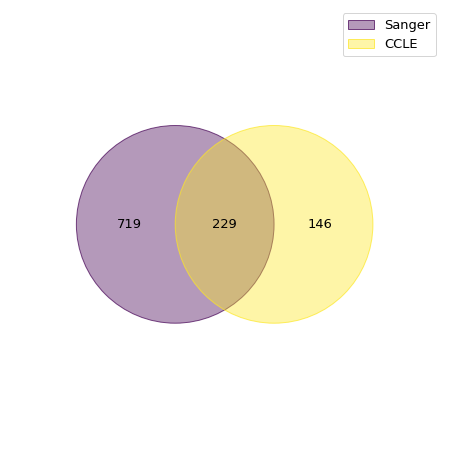

In [211]:
venn(cell_line_dict)

# correlation

## by every protein in each sample

In [303]:
ccle_protein_melt = pd.melt(ccle_protein, id_vars='Cell_line', value_name='CCLE_protein', var_name='protein')

In [304]:
sanger_protein_melt = pd.melt(protein_sample_avg,
                              id_vars='Cell_line',
                              value_name='Sanger_protein',
                              var_name='protein')

In [305]:
combined = pd.merge(ccle_protein_melt, sanger_protein_melt, on=['Cell_line', 'protein'])

In [306]:
combined = combined.dropna()

In [307]:
spearmanr(combined['CCLE_protein'], combined['Sanger_protein'])

SpearmanrResult(correlation=0.3924127733391362, pvalue=0.0)

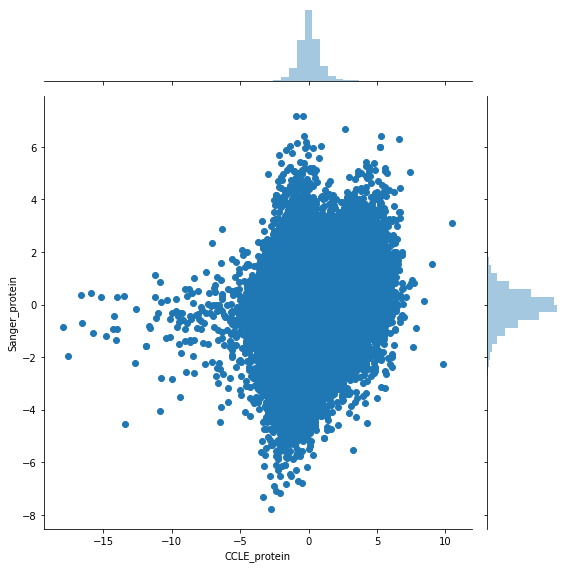

In [241]:
# plt.figure(figsize=(12, 8))
sns.jointplot('CCLE_protein', 'Sanger_protein', combined, kind='scatter', height=8)

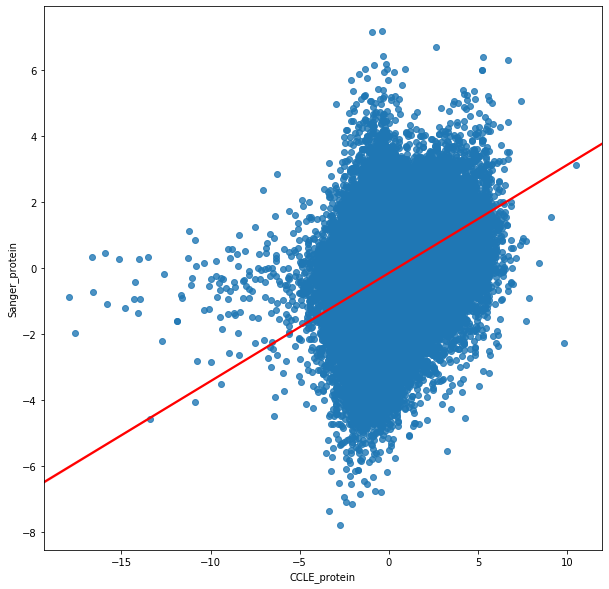

In [242]:
plt.figure(figsize=(10, 10))
sns.regplot('CCLE_protein', 'Sanger_protein', combined,
            line_kws={'color': 'red'})

In [218]:
combined = pd.merge(combined,
                    ic50[['Cell line name', 'Tissue']].drop_duplicates(),
                    left_on=['Cell_line'],
                    right_on=['Cell line name'])

## overall protein

In [251]:
ccle_protein_common = ccle_protein[ccle_protein['Cell_line'].isin(common_cell_lines)]
ccle_protein_common = pd.concat([ccle_protein_common['Cell_line'], ccle_protein_common[common_proteins]], axis=1)
ccle_protein_common = ccle_protein_common.drop_duplicates(['Cell_line'])
ccle_protein_common.to_csv("../data/ccle/protein_matrix_common.tsv", index=False, sep='\t')

In [271]:
ccle_protein_common = ccle_protein[ccle_protein['Cell_line'].isin(common_cell_lines)]
ccle_protein_common = ccle_protein_common.drop_duplicates(['Cell_line'])
ccle_protein_common.to_csv("../data/ccle/protein_matrix_common_all_proteins.tsv", index=False, sep='\t')

In [248]:
protein_sample_avg_common = protein_sample_avg[
    protein_sample_avg['Cell_line'].isin(common_cell_lines)]
protein_sample_avg_common = pd.concat([
    protein_sample_avg_common['Cell_line'],
    protein_sample_avg_common[common_proteins]
],
                                      axis=1)

protein_sample_avg_common.to_csv("../data/protein/P06_matrix_common.tsv",
                                 index=False,
                                 sep='\t')

In [219]:
ccle_protein_common = ccle_protein[ccle_protein['Cell_line'].isin(
    common_cell_lines)].drop_duplicates('Cell_line')
sanger_protein_common = protein_sample_avg[
    protein_sample_avg['Cell_line'].isin(common_cell_lines)]

In [220]:
sanger_protein_common.head()

,Cell_line,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,1A03_HUMAN,1A24_HUMAN,2A5D_HUMAN,2A5E_HUMAN,2AAA_HUMAN,2AAB_HUMAN,2ABA_HUMAN,2B19_HUMAN,3HIDH_HUMAN,3MG_HUMAN,41_HUMAN,4ET_HUMAN,4F2_HUMAN,5NT3A_HUMAN,5NTD_HUMAN,6PGD_HUMAN,6PGL_HUMAN,7B2_HUMAN,8ODP_HUMAN,A16A1_HUMAN,A2MG_HUMAN,A4_HUMAN,AAAS_HUMAN,AAAT_HUMAN,AAGAB_HUMAN,AAK1_HUMAN,AAMDC_HUMAN,AAPK1_HUMAN,AASD1_HUMAN,AASS_HUMAN,AATC_HUMAN,AATF_HUMAN,AATM_HUMAN,AB1IP_HUMAN,ABCB6_HUMAN,ABCBA_HUMAN,ABCD1_HUMAN,ABCD3_HUMAN,ABCE1_HUMAN,ABCF1_HUMAN,ABCF2_HUMAN,ABCF3_HUMAN,...,YRDC_HUMAN,YTHD2_HUMAN,YTHD3_HUMAN,Z280C_HUMAN,ZA2G_HUMAN,ZC11A_HUMAN,ZC3H4_HUMAN,ZC3HD_HUMAN,ZC3HE_HUMAN,ZC3HF_HUMAN,ZCCHL_HUMAN,ZCCHV_HUMAN,ZCH18_HUMAN,ZCHC8_HUMAN,ZDHC5_HUMAN,ZEB2_HUMAN,ZFAN6_HUMAN,ZFHX3_HUMAN,ZFPL1_HUMAN,ZFR_HUMAN,ZFY16_HUMAN,ZHX2_HUMAN,ZN185_HUMAN,ZN207_HUMAN,ZN318_HUMAN,ZN326_HUMAN,ZN384_HUMAN,ZN428_HUMAN,ZN512_HUMAN,ZN593_HUMAN,ZN598_HUMAN,ZN622_HUMAN,ZN638_HUMAN,ZN687_HUMAN,ZN706_HUMAN,ZN768_HUMAN,ZNF22_HUMAN,ZNF24_HUMAN,ZNT9_HUMAN,ZO1_HUMAN,ZO2_HUMAN,ZPR1_HUMAN,ZRAB2_HUMAN,ZW10_HUMAN,ZYX_HUMAN,sp|P49327|FAS_HUMAN,sp|P78527|PRKDC_HUMAN,sp|Q00610|CLH1_HUMAN,sp|Q13813|SPTN1_HUMAN,sp|Q14204|DYHC1_HUMAN
8,697,-0.012778,0.159762,0.048246,0.327131,0.063071,0.528702,0.258052,NaN,NaN,0.227486,0.411906,0.371670,-0.241474,-0.106116,NaN,-0.149692,0.307886,-0.067738,0.212020,-0.680828,-1.138322,-0.648124,0.971858,0.949152,NaN,0.490889,0.380162,1.767660,-0.407201,0.091474,-0.852206,-0.376494,0.068607,-0.604392,-0.399751,0.686858,0.234138,-0.095202,0.048480,-0.905115,1.159026,NaN,0.536978,NaN,-1.066933,0.195571,0.006639,-0.179209,-0.158149,...,-0.445221,0.443169,-0.191352,0.225131,NaN,0.168298,0.643507,0.253736,-0.009822,0.357548,-0.203960,0.031060,-0.187292,0.004399,-0.178895,0.430404,-0.299727,1.889076,-0.567871,0.030200,1.009462,1.427045,0.399929,0.527411,0.701600,-0.324233,-0.083370,0.846396,-0.270021,-0.051548,0.083240,NaN,-0.150849,0.499081,0.723587,NaN,0.881114,-0.057979,-0.895801,-0.953393,-0.676603,-0.021120,0.193618,0.081453,-1.379753,0.262772,-0.199734,-0.101727,0.287671,0.222237
9,769-P,-0.180015,-0.224150,0.553788,0.165320,0.051575,0.108861,1.171087,-2.261661,0.163124,-0.601304,-0.842795,0.208992,-2.507792,-0.265437,NaN,-0.104355,0.217221,-0.558452,0.551174,-0.290908,-0.030351,-0.429102,-0.909720,0.372485,NaN,NaN,0.351702,NaN,0.806720,-0.124112,0.187267,0.370772,0.401824,-0.943892,-0.140334,0.120542,0.388030,0.547744,-0.050130,-0.102095,0.291860,NaN,0.278759,NaN,-0.230887,-0.103277,-0.167649,-0.131454,0.384096,...,-0.094523,0.322290,0.845521,-0.674975,NaN,0.059018,0.433709,-0.624513,-0.822983,0.573266,-1.229991,0.401050,-0.073692,0.142697,0.496830,1.405671,0.564720,1.388573,-0.237866,-0.057755,0.024125,-0.325974,0.213556,0.119313,-0.235171,-0.536889,-0.202948,-0.477299,-1.104015,0.214152,0.036475,-0.203214,-0.176078,-0.593225,0.775802,NaN,0.868701,-0.380619,0.063003,0.458159,1.196235,-0.500589,-0.119426,-0.871397,1.465776,-0.049945,-0.391131,0.604612,0.886561,-0.363771
12,8305C,0.580144,-0.684909,0.020876,-0.620807,-0.507017,-0.279862,0.226353,NaN,NaN,-0.059338,0.493561,-0.018222,0.220922,NaN,NaN,-1.002906,0.939910,-1.611817,-2.278304,-0.680283,-1.727213,-0.227176,-0.900029,0.439236,-0.221220,NaN,-0.966481,-0.501822,0.168274,0.253837,-0.736578,-0.921845,-0.615714,-0.339152,0.460460,-0.373074,0.900572,-0.760684,-0.459661,0.333771,-0.612313,1.070726,NaN,NaN,-0.402932,-0.620299,-0.129098,0.988354,0.437329,...,0.371827,-0.689529,0.550223,-0.490517,0.263275,0.004073,-0.325112,-0.092621,-0.197710,0.143544,0.375311,-0.391479,0.068774,-0.072763,0.357901,1.143226,-0.080803,-0.004114,0.863641,-0.034740,NaN,-0.119072,-0.284558,-0.493417,NaN,0.230847,0.375747,-2.001813,-0.604259,-0.368904,0.414102,-0.665310,-0.318735,-0.849026,-0.129397,0.685892,NaN,0.272784,-0.186701,0.303426,0.658809,-0.067633,-0.006781,0.277701,-0.218604,-0.919226,-0.101327,0.358541,-0.104576,0.849423
13,8505C,0.996489,0.194122,-0.191444,-0.628574,0.317567,-0.234740,0.660082,NaN,NaN,-0.0

In [221]:
ccle_protein_common.head()

,S12A2_HUMAN,HXD13_HUMAN,KDM1A_HUMAN,SOX1_HUMAN,SOX2_HUMAN,SOX3_HUMAN,SOX15_HUMAN,PHX2B_HUMAN,ALX4_HUMAN,ALX1_HUMAN,PRRX1_HUMAN,ARX_HUMAN,SHOX2_HUMAN,PRRX2_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA3_HUMAN,SOGA1_HUMAN,NU133_HUMAN,SOGA2_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,FUBP1_HUMAN,FUBP1_HUMAN,MMP24_HUMAN,MMP14_HUMAN,MMP15_HUMAN,SH3R3_HUMAN,SH3R1_HUMAN,SH3R2_HUMAN,MTMRE_HUMAN,SAMD1_HUMAN,S19A2_HUMAN,CLPX_HUMAN,ATX7_HUMAN,CATIN_HUMAN,NUCL_HUMAN,H7BY16_HUMAN,U119B_HUMAN,U119A_HUMAN,RBM42_HUMAN,RCC2_HUMAN,CHPF2_HUMAN,TAL1_HUMAN,LYL1_HUMAN,RNBP6_HUMAN,IPO5_HUMAN,SORT_HUMAN,...,SCNNG_HUMAN,MOT5_HUMAN,F168A_HUMAN,TMPS2_HUMAN,H0Y572_HUMAN,ECP_HUMAN,CCD37_HUMAN,TM2D1_HUMAN,RM42_HUMAN,CNIH1_HUMAN,PEMT_HUMAN,VCC1_HUMAN,SLX1_HUMAN,TM127_HUMAN,CATE_HUMAN,KISS1_HUMAN,COX14_HUMAN,GNT2A_HUMAN,LUR1L_HUMAN,ELOV4_HUMAN,EPT1_HUMAN,GCSAM_HUMAN,AHSP_HUMAN,S35D1_HUMAN,SHSA3_HUMAN,CRUM3_HUMAN,BODG_HUMAN,YIPF5_HUMAN,FANCF_HUMAN,MASP2_HUMAN,COX7B_HUMAN,SFT2A_HUMAN,NEPR1_HUMAN,ERD21_HUMAN,MTURN_HUMAN,PRDM6_HUMAN,KISHA_HUMAN,AQP1_HUMAN,NEK8_HUMAN,S46A3_HUMAN,NU2M_HUMAN,NU3M_HUMAN,BMP6_HUMAN,MET20_HUMAN,CCL26_HUMAN,AL5AP_HUMAN,CYTM1_HUMAN,MGST2_HUMAN,CNIH4_HUMAN,Cell_line
288,-0.014830,NaN,0.371214,NaN,NaN,NaN,NaN,-0.484939,NaN,NaN,NaN,NaN,NaN,NaN,0.211802,0.676623,NaN,0.035083,0.352218,2.131164,-0.199350,0.829473,0.563890,-0.120887,0.676403,1.042547,NaN,-1.846649,-0.471961,NaN,0.383590,NaN,0.519716,0.497957,NaN,-0.147127,-0.405337,-0.039539,0.080190,NaN,1.407439,0.662219,0.763936,1.595446,-1.689044,NaN,NaN,-0.413137,0.519802,-0.392556,...,NaN,NaN,1.591769,-2.334204,-0.841525,NaN,NaN,NaN,-0.445477,NaN,NaN,NaN,NaN,-0.991583,NaN,NaN,-1.568372,NaN,-1.077891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.343008,NaN,NaN,-0.515774,-0.648173,NaN,NaN,NaN,NaN,-0.876812,NaN,NaN,NaN,-0.044232,-0.321381,NaN,NaN,NaN,NaN,-5.366966,-1.770107,-0.819195,697
352,-0.565860,-2.543331,-0.817089,NaN,NaN,NaN,NaN,-0.632625,-1.040727,NaN,-1.059384,-0.302098,NaN,NaN,0.059223,0.777897,0.617254,-0.501662,-0.115651,1.607432,1.261613,0.549408,-0.642000,-0.057591,-0.163262,-0.562537,NaN,-0.107116,NaN,0.065212,2.028946,NaN,-0.458419,-0.718867,-1.147,0.381360,-0.379858,-0.356591,-0.061006,0.882533,-0.003419,-0.080128,-0.375126,-1.182134,-0.196006,-0.846265,NaN,0.140418,0.030299,-1.973374,...,NaN,3.363354,-0.253025,-1.024221,0.161150,NaN,0.061543,NaN,0.025353,-0.934827,NaN,NaN,NaN,NaN,NaN,-0.487086,0.830884,NaN,NaN,-1.58357,0.255767,NaN,NaN,NaN,NaN,NaN,NaN,0.325366,NaN,NaN,0.697488,NaN,0.49772,0.502232,-0.656198,-0.356282,0.646515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.144409,769-P
289,-0.171374,NaN,0.114119,NaN,NaN,NaN,NaN,0.012005,NaN,NaN,NaN,NaN,NaN,NaN,-0.302972,0.164879,NaN,-0.112063,0.481013,0.077932,-1.002229,0.981709,-0.848187,-0.066940,-0.760553,-1.141908,NaN,1.659393,-1.863262,NaN,-0.587157,NaN,-0.688748,-1.861318,NaN,-0.399332,-0.952061,0.274519,-0.194083,NaN,-1.984570,-0.303098,-1.142661,-0.432320,1.224125,NaN,NaN,0.759160,0.299032,-1.577326,...,NaN,NaN,-2.254048,-1.119689,0.821083,NaN,NaN,NaN,-1.061156,NaN,NaN,NaN,NaN,-0.069770,NaN,NaN,0.744388,NaN,0.769691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.786105,NaN,NaN,-0.162846,0.079507,NaN,NaN,NaN,NaN,1.726126,NaN,NaN,NaN,0.724125,0.243461,NaN,NaN,NaN,NaN,-0.602651,-0.029221,0.455337,8305C
252,-0.191362,NaN,-0.418036,NaN,-1.526527,NaN,NaN,NaN,NaN,-0.449326,NaN,NaN,NaN,NaN,0.202000,-0.768566,NaN,1.400866,-0.198466,1.126557,0.521155,0.076010,-0.232553,0.206490,-0.723017,-0.750251,NaN,0.523218,-0.197853,NaN,1.356873,NaN,0.509285,-0.606746,NaN,0.062449,-0.238131,-0.049273,-0.754672,-0.927415,-0.011920,0.726924,-0.820212,-0.428920,NaN,NaN,NaN,-0.180411,0.616505,-0.418600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251828,-0.144368,NaN,NaN,NaN,NaN,-0.351487,NaN,NaN,NaN,NaN,0.010454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.762826,NaN,NaN,-1.444139,0.533556,NaN,0.626822,NaN,NaN,NaN,NaN,NaN,NaN,-0.368450,0.063893,NaN,NaN,NaN,-0.977010,NaN,NaN,-0.126585,8505C
370,-0.921176,NaN,-0.455601,NaN,1.136851,NaN,-0.481905,NaN,NaN,NaN,NaN,NaN,1.82077,NaN,0.063200,0.7040

In [222]:
ccle_protein_common = ccle_protein_common.loc[:,~ccle_protein_common.columns.duplicated()]

In [223]:
corr_dict = {}
for protein in common_proteins:
    tmp_df_dict = {}
    tmp_df_dict['sanger'] = list(sanger_protein_common[protein].values)
    tmp_df_dict['ccle'] = list(ccle_protein_common[protein].values)
    tmp_df = pd.DataFrame(tmp_df_dict)
    tmp_df = tmp_df.dropna()
    corr = spearmanr(tmp_df['sanger'].values,
                                   tmp_df['ccle'].values)[0]
    if not np.isnan(corr):
        corr_dict[protein] = corr

Text(-0.7999999999999999, 300, 'Median: 0.4384')

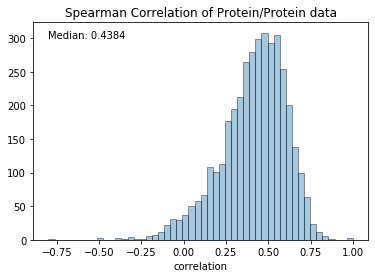

In [224]:
sns.distplot(list(corr_dict.values()),
             kde=False,
             hist_kws=dict(edgecolor="k", linewidth=1))
plt.title("Spearman Correlation of Protein/Protein data")
plt.xlabel("correlation")
plt.text(np.min(list(corr_dict.values())), 300,
         f"Median: {np.median(list(corr_dict.values())):.4f}")

# P05

In [282]:
ic50 = pd.read_csv("../data/drug/ic50_processed_median.csv")

In [283]:
meta = pd.read_csv("../data/E0022_P01-P05_sample_map.txt", sep='\t')

In [284]:
protein_raw = pd.read_csv("../data/protein/E0022_P05_protein_intensities.txt", sep='\t')

In [285]:
protein_raw = protein_raw.rename(columns={'Unnamed: 0': 'Automatic_MS_filename'})
protein_raw_merge = pd.merge(protein_raw, meta[['Automatic_MS_filename', 'Cell_line']])

protein_sample_avg = protein_raw_merge.drop(['Automatic_MS_filename'],
                                            axis=1).groupby(['Cell_line']).agg(np.nanmean).reset_index()

In [286]:
protein_sample_avg = protein_sample_avg.sort_values(by=['Cell_line'])

In [287]:
cell_line_dict = {"Sanger":set(protein_sample_avg['Cell_line'].unique()),
                 "CCLE":set(ccle_protein['Cell_line'].unique())}

In [288]:
common_cell_lines = list(
    set(protein_sample_avg['Cell_line'].unique()).intersection(
        set(ccle_protein['Cell_line'].unique())))

common_proteins = list(
    set(protein_sample_avg.drop(['Cell_line'], axis=1).columns).intersection(
        set(ccle_protein.drop(['Cell_line'], axis=1).columns)))

In [289]:
len(common_proteins)

3720

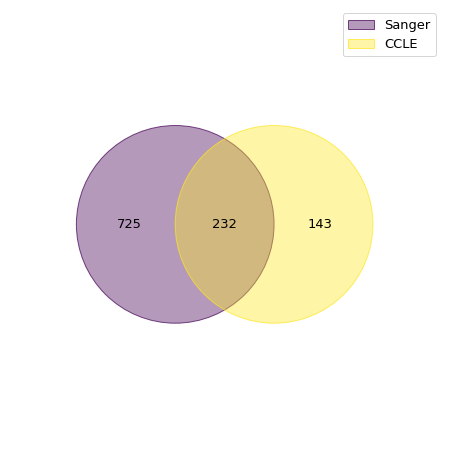

In [290]:
venn(cell_line_dict)

In [291]:
ccle_protein_melt = pd.melt(ccle_protein, id_vars='Cell_line', value_name='CCLE_protein', var_name='protein')

In [292]:
sanger_protein_melt = pd.melt(protein_sample_avg,
                              id_vars='Cell_line',
                              value_name='Sanger_protein',
                              var_name='protein')

In [293]:
combined = pd.merge(ccle_protein_melt, sanger_protein_melt, on=['Cell_line', 'protein'])

In [294]:
combined = combined.dropna()

In [297]:
spearmanr(combined['CCLE_protein'], combined['Sanger_protein'])

SpearmanrResult(correlation=0.3680992573036355, pvalue=0.0)

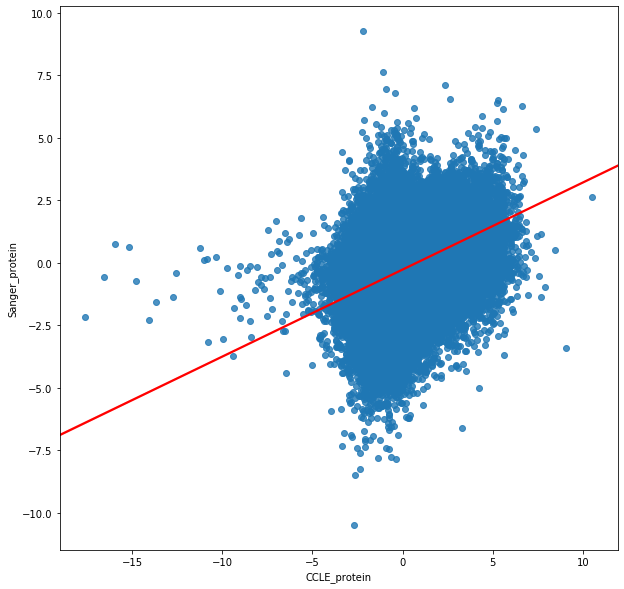

In [296]:
plt.figure(figsize=(10, 10))
sns.regplot('CCLE_protein', 'Sanger_protein', combined,
            line_kws={'color': 'red'})

In [200]:
combined = pd.merge(combined,
                    ic50[['Cell line name', 'Tissue']].drop_duplicates(),
                    left_on=['Cell_line'],
                    right_on=['Cell line name'])

In [201]:
ccle_protein_common = ccle_protein[ccle_protein['Cell_line'].isin(
    common_cell_lines)].drop_duplicates('Cell_line')
sanger_protein_common = protein_sample_avg[
    protein_sample_avg['Cell_line'].isin(common_cell_lines)]

In [202]:
ccle_protein_common = ccle_protein_common.loc[:,~ccle_protein_common.columns.duplicated()]

In [203]:
corr_dict = {}
for protein in common_proteins:
    tmp_df_dict = {}
    tmp_df_dict['sanger'] = list(sanger_protein_common[protein].values)
    tmp_df_dict['ccle'] = list(ccle_protein_common[protein].values)
    tmp_df = pd.DataFrame(tmp_df_dict)
    tmp_df = tmp_df.dropna()
    corr = spearmanr(tmp_df['sanger'].values,
                                   tmp_df['ccle'].values)[0]
    if not np.isnan(corr):
        corr_dict[protein] = corr

Text(-1.0, 300, 'Median: 0.3890')

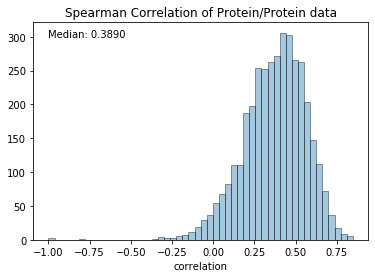

In [204]:
sns.distplot(list(corr_dict.values()),
             kde=False,
             hist_kws=dict(edgecolor="k", linewidth=1))
plt.title("Spearman Correlation of Protein/Protein data")
plt.xlabel("correlation")
plt.text(np.min(list(corr_dict.values())), 300,
         f"Median: {np.median(list(corr_dict.values())):.4f}")

# model comparison

In [278]:
ccle_score = pd.read_csv("../work_dirs/ccle_common/SVM/scores_202003171523.csv")
ccle_score_all = pd.read_csv("../work_dirs/ccle_common/SVM/scores_202003171603.csv")
sanger_score = pd.read_csv("../work_dirs/sanger_common_median/SVM/scores_202003171523.csv")

In [279]:
test_corr_df = pd.merge(ccle_score[['Drug Id', 'test_corr']],
                        ccle_score_all[['Drug Id', 'test_corr']],
                        on=['Drug Id'],
                        suffixes=['_ccle_corr', '_ccle_all_corr'])

test_corr_df = pd.merge(test_corr_df,
                        sanger_score[['Drug Id', 'test_corr']],
                        on=['Drug Id'])
test_corr_df = test_corr_df.rename(columns={"test_corr":'test_corr_sanger_corr'})

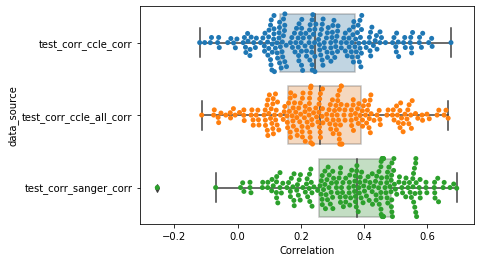

In [281]:
tmp_data = pd.melt(test_corr_df[[
    'Drug Id', 'test_corr_ccle_corr', 'test_corr_ccle_all_corr',
    'test_corr_sanger_corr'
]],
                   id_vars='Drug Id',
                   value_vars=[
                       'test_corr_ccle_corr', 'test_corr_ccle_all_corr',
                       'test_corr_sanger_corr'
                   ],
                   var_name='data_source',
                   value_name='Correlation')
ax = sns.boxplot('Correlation',
                 'data_source',
                 data=tmp_data,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('Correlation', 'data_source', data=tmp_data, orient='h')

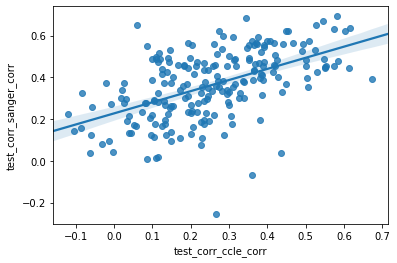

In [269]:
sns.regplot('test_corr_ccle_corr', 'test_corr_sanger_corr', test_corr_df)

In [258]:
sanger_score['test_corr'].mean()

0.3640381756897253

In [257]:
ccle_score['test_corr'].mean()

0.2554949006192847